      width < 10: #34706
10 <= width < 20: #57250
20 <= width < 30: #24885
30 <= width < 40: #13338
40 <= width < 50: #8011
50 <  width     : #20699
# of invalid bbox = 535


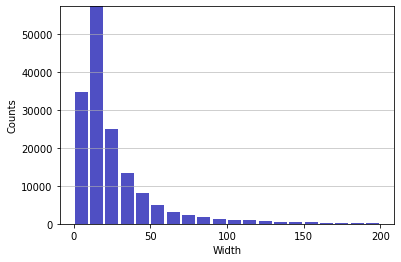

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

annotation_list = []
list_a_list = []
w_list = []
bbox_list = []
bbox_invalid_list = []
w1 = 0
w2 = 0
w3 = 0
w4 = 0
w5 = 0
w6 = 0
w_count_list = []

def display_distributions(widths):
  if not widths:
     print('The input list is empty!')
     return
  bin_range = range(0, 201, 10)
  n, bins, patches = plt.hist(x=widths, bins=bin_range, color='#0504aa', alpha=0.7, rwidth=0.85)
  plt.rcParams.update({'font.size': 14})
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Width')
  plt.ylabel('Counts')
  maxfreq = n.max()
  plt.ylim(top=np.round(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()
  
  

  
if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
  # Enter your code here (20%)
  # You might use the following to access each line
  

  for line in lines:
    
    annotation = line.strip().split(' ')
    annotation = np.array(annotation[1:])
    annotation =[int(x) for x in annotation]
    annotation_list.append(annotation)
    
    #print(annotation_list)
    #print("annotation = " , annotation_list[0])
    #print(type(annotation))
    
    
  for list_a in annotation_list:
      
      _q = int(len(list_a)/4)
      #print(_q)
      list_a = np.reshape(list_a,(_q,-1))
      #print(list_a)
      #print("...........")
      #print(list_a)
      list_a_list.append(list_a)
      
      for list_b in list_a:
          #print(list_b)
          #print("...........")
          bbox = list_b 
          #print(bbox)
          w = bbox[2] - bbox[0] + 1
          
          if((bbox[0] < 0) or (bbox[1] < 0) or (bbox[2] <= bbox[0]) or (bbox[3] <= bbox[1])):
                bbox_invalid_list.append(bbox)
     
          else:
                bbox_list.append(bbox)
                w_list.append(w)
                  
  #print(w_list)
          #print(w)
              #(w_list)
 
  for w in w_list:
      
      if w < 10:
         w1 = w1 + 1
      elif ((w < 20)&(w >= 10)):
         w2 = w2 + 1
      elif ((w < 30)&(w >= 20)):
         w3 = w3 + 1
      elif ((w < 40)&(w >= 30)):
         w4 = w4 + 1
      elif ((w < 50)&(w >= 40)):
         w5 = w5 + 1
      elif w >= 50:
         w6 = w6 + 1
      
  print("      width < 10: #" + str(w1))
  print("10 <= width < 20: #" + str(w2))
  print("20 <= width < 30: #" + str(w3))
  print("30 <= width < 40: #" + str(w4))
  print("40 <= width < 50: #" + str(w5))
  print("50 <  width     : #" + str(w6))
  print("# of invalid bbox = " + str(len(bbox_invalid_list)))
    # After you finish Step 2,
  # you may use the following function to visualize the distribution of widths  
  display_distributions(w_list)
  
  """
  w_count_list = [w1, w2, w3, w4 ,w5, w6]
  x_list = ['<10','10~20','20~30','30~40','40~50','>50']

  plt.bar(range(6),w_count_list, align = 'center',color= 'steelblue', alpha = 0.8) 
  # 添加軸標籤 
  plt.ylabel('number')   
  plt.title('Number of width in very range:') 

  # 添加刻度標籤 
  plt.xticks(range(6),x_list) 
  # 設置Y軸的刻度範圍 
  plt.ylim([500,60000]) 
  # 為每個條形圖添加數值標籤 
  for x,y in enumerate(w_count_list):
        plt.text(x,y,'%s'%y,ha='center') 
  
  plt.show()
  """


  

In [ ]:
# The above code only considers valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.
# Ans: 535 bounding boxes are valid.在Code中有判斷invalid並儲存該bbox的bbox_invalid_list，最後再由len(bbox_invalid_list)知道該數量。

In [ ]:
# Discuss the types of situations that give rise to invalid bounding boxes. (5%)
# Write down your answer here.
#Ans: 若使用自定義寫死的bbox valid函式(ex:(x-50,y-50))，則可能產生誤判的情況。另外，若圖片經過縮放，
#變形，反轉等操作，亦有可能因為這個函式造成invalid的bounding boxes產生(例如減完之後小於零)。